# Structure Learning

<img style="float: right; margin: 0px 0px 15px 15px;" src="figures/Intro.png" width="600px" height="600px" />

> In the last two sessions we studied how to estimate the parameters of both Bayesian Networks and Markov Networks. We made a strong assumption that we know the network structure in advance.
>
> In this session we will takcle the task of learning in situations when we don't know the structure of the Bayesian network in advance.

> **Objetives:**
> - To understand the maximum likelihood score for structure learning in Bayesian Networks.
> - To study the BIC score for structure learning in Bayesian Networks.

> **References:**
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 18.
> - Mastering Probabilistic Graphical Models Using Python, By Ankur Ankan and Abinash Panda. Ch. 5.
> - Probabilistic Graphical Models Specialization, offered through Coursera. Prof. Daphne Koller.

___

## 1. Overview

### 1.1. Why would we be interested in learning a structure?

- To learn a model for new queries, when the domain expertise is not enough.

- For structure discovery, when inferring network structure is a goal itself.

### 1.2. Importance of accurate structure

Let's assume that the true model for some situation is the following:

In [1]:
from IPython.display import Image

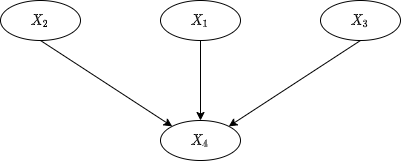

In [2]:
Image("figures/AccurateStructure.png")

*What happens if an arc is missing?*

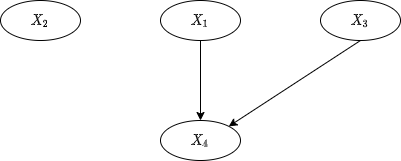

In [3]:
Image("figures/AccurateStructure1.png")

- The model encodes inccorrect independencies.
- The correct distribution $P^*$ cannot be learned.
- However, it could generalize better :)

*What happens if an arc is added?*

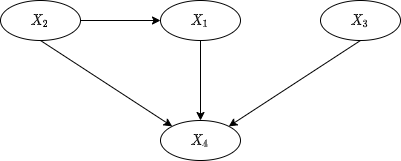

In [4]:
Image("figures/AccurateStructure2.png")

- The model encodes spurious dependencies.
- Can correctly learn the correct distribution $P^*$.
- More parameters to learn.
- In general, leads to worse generalization.

### 1.3. Score-based learning

To carry out the structure learning, we define a structure that evaluates how well a structure matches the data:

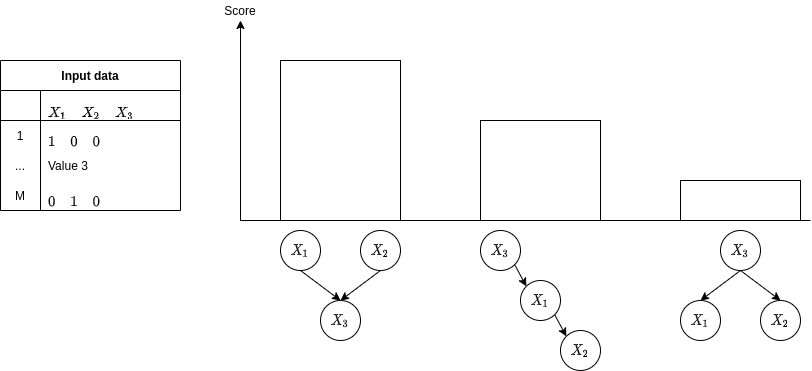

In [5]:
Image("figures/ScoreBasedLearning.png")

Then, we search for the structure that maximizes the score.

## 2. Likelihood score

### 2.1. Introduction

The idea under the likelihood score is to find the structure $(\mathcal{G}, \theta)$ to maximize the likelihood:

$$\mathrm{score}_L (\mathcal{G}: \mathcal{D}) = l((\hat{\theta}, \mathcal{G}): \mathcal{D}) = \log \mathcal{L}((\hat{\theta}, \mathcal{G}): \mathcal{D})$$

where $\hat{\theta} = \theta_{MLE}$ is the MLE of the parameters given $\mathcal{G}$ and $\mathcal{D}$.

**Example:**

Consider the two random variables $X$ and $Y$.

First, consider the graph structure $\mathcal{G}_0:$

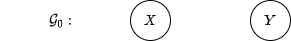

In [6]:
Image("figures/Example1.png")

The likelihood score is:

$$\mathrm{score}_L(\mathcal{G}_0: \mathcal{D}) =  \sum_{d=1}^{M} \left(\log\hat{\theta}_{x[d]} + \log\hat{\theta}_{y[d]}\right)$$

Now, consider the graph structure $\mathcal{G}_1:$

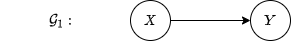

In [7]:
Image("figures/Example2.png")

The likelihood score is:

$$\mathrm{score}_L(\mathcal{G}_1: \mathcal{D}) = \sum_{d=1}^{M} \left(\log\hat{\theta}_{x[d]} + \log\hat{\theta}_{y[d]|x[d]}\right)$$

Now, let's compute the difference between them:

\begin{align}
\mathrm{score}_L(\mathcal{G}_1: \mathcal{D}) - \mathrm{score}_L(\mathcal{G}_0: \mathcal{D}) & = \sum_{d=1}^{M}\left(\log\hat{\theta}_{y[d]|x[d]} - \log\hat{\theta}_{y[d]}\right) \\
& = \sum_{x,y} M(x, y) \log\hat{\theta}_{y|x} - \sum_{y} M(y) \log\hat{\theta}_{y} \\
& = M \left(\sum_{x,y} \hat{P}(x, y) \log\hat{P}(x| y) - \sum_{y} \hat{P}(y) \log\hat{P}(y)\right),
\end{align}

where $\hat{P}$ is the empirical distribution (frequency counts).

Moreover, recall that $\sum_{x} \hat{P}(x, y) = \hat{P}(y)$. Then,

\begin{align}
\mathrm{score}_L(\mathcal{G}_1: \mathcal{D}) - \mathrm{score}_L(\mathcal{G}_0: \mathcal{D}) & = M \left(\sum_{x,y} \hat{P}(x, y) \log\hat{P}(x| y) - \sum_{x,y} \hat{P}(x,y) \log\hat{P}(y)\right) \\
& = M \sum_{x,y} \hat{P}(x, y) \left(\log\hat{P}(x| y) - \log\hat{P}(y)\right) \\
& = M \sum_{x,y} \hat{P}(x, y) \log\frac{\hat{P}(x| y)}{\hat{P}(y)} \\
& = M I_{\hat{P}} (X; Y),
\end{align}

where $I_{\hat{P}} (X; Y)$ is **the mutual information** between the variables $X$ and $Y$ w.r.t. the empirical distribution $\hat{P}$.

Intuitively, the mutual information $I_{\hat{P}} (X; Y)$ measures how close the variables $X$ and $Y$ are to the independence.

### 2.2. General decomposition

The above is not only for this simple example. In fact, one can easily show that:

$$\mathrm{score}_L(\mathcal{G}: \mathcal{D}) = M \sum_{i=1}^{n} I_{\hat{P}}(X_i, \mathrm{Pa}X_i) - M \sum_{i=1}^{n} H_{\hat{P}}(X_i),$$

where:

- $I_{\hat{P}}(X; Y) = \sum_{x,y} P(x, y) \log \frac{P(x,y)}{P(x)P(y)}$ is the mutual information.

- $H_{\hat{P}}(X) = - \sum_{x} P(x) \log P(x)$ is the entropy.

Note that the entropy $H_{\hat{P}}(X)$ is independent of the graph structure $\mathcal{G}$.

Then, the score is higher if the nodes $X_i$ is correlated with its parents.

**Limitations:**

Following the above, note that the difference of having an arc with not having it is:

$$\mathrm{score}_L(\mathcal{G}_1: \mathcal{D}) - \mathrm{score}_L(\mathcal{G}_0: \mathcal{D}) = M I_{\hat{P}} (X, Y).$$

Some comments:
- The mutual information is always nonnegative: $I_{\hat{P}} (X, Y) \geq 0.$
- It equals zero if and onlyt if $X$ and $Y$ are independent (in the empirical distribution $\hat{P}$).
- Even if $X \perp Y$ in the true distribution $P^*$, almost always $I_{\hat{P}} (X, Y) > 0$.
- Thus, adding edges can't hurt this score, and almost always helps.

### The maximum likelihood score is maximized for fully connected networks: overfitting.

### Because of the above, this score is never used (it is not implemented in `pgmpy`)

In [8]:
# Import numpy and pandas
import pandas as pd
import numpy as np

In [9]:
# Generate some data (X, Y)
M = 10000
raw_data = np.random.randint(low=0, high=2, size=(M, 2))

In [10]:
# Wrap data into a data frame
data = pd.DataFrame(data=raw_data, columns=['X', 'Y'])
data.head()

,X,Y
0,1,1
1,1,0
2,0,0
3,0,0
4,0,1


In [15]:
# Empirical probabilities
# P(X)
P_X = data['X'].value_counts() / M
# P(Y)
P_Y = data['Y'].value_counts() / M
# P(X, Y)
P_XY = data.groupby(by=['X', 'Y'])['X'].agg('count') / M
# P(X)P(Y)
P_XP_Y = pd.Series([px * py for py in P_Y.values for px in P_X.values],
                   index=P_XY.index
                  )

In [17]:
# Scores
# X    Y
score0 = M * ((P_X * np.log(P_X)).sum() + (P_Y * np.log(P_Y)).sum())
# X -> Y
score1 = score0 + M * (P_XY * np.log(P_XY / (P_XP_Y))).sum()
# X <- Y
score2 = score0 + M * (P_XY * np.log(P_XY / (P_XP_Y))).sum()

score0, score1, score2

(-13862.304798959402, -13860.442789747847, -13860.442789747847)

In [18]:
# Select best score
score1

-13860.442789747847

## 3. BIC score

How can we avoid overfitting?
- We can restrict the hypothesis space:
  - Restrict number of parents or parameters.
  
- We can penalyze the complexity.

An explicit penalization of the complexity is done by the **Bayesian Information Criterion (BIC) score**:

$$\mathrm{score}_{BIC}(\mathcal{G}: \mathcal{D}) = \mathrm{score}_{L}(\mathcal{G}: \mathcal{D}) - \frac{\log M}{2} \mathrm{Dim}[\mathcal{G}],$$

where $\mathrm{Dim}[\mathcal{G}]$ is the number of independent parameters implied by the structure $\mathcal{G}$.

This score directly represents the tradeoff between fit to the data and model complexity.

**Asymptotic consistency:**

We have that:

$$\mathrm{score}_{BIC}(\mathcal{G}: \mathcal{D}) = M \sum_{i=1}^{n} I_{\hat{P}}(X_i, \mathrm{Pa}X_i) - M \sum_{i=1}^{n} H_{\hat{P}}(X_i) - \frac{\log M}{2} \mathrm{Dim}[\mathcal{G}]$$

The mutual information grows linearly with $M$ whereas the complexity grows logarithmically with $M$.

> As $M\to\infty$, more emphasis is given to fit to the data than to model complexity.
>
> Thus, as $M\to\infty$, ($\hat{P} \to P^*$) the true structure $\mathcal{G}^*$ will maximize the score.

In [19]:
# Import pgmpy.estimators.BicScore, pgmpy.estimators.ExhaustiveSearch, pgmpy.models.BayesianModel
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.models import BayesianModel
from pgmpy.estimators import BicScore

In [20]:
# Instantiate BicScore
bic = BicScore(data)

In [27]:
# Models
# X    Y
model0 = BayesianModel()
model0.add_nodes_from(['X', 'Y'])
# X -> Y
model1 = BayesianModel([('X', 'Y')])
# X <- Y
model2 = BayesianModel([('Y', 'X')])

In [28]:
# Scores
# X    Y
score0 = bic.score(model0)
# X -> Y
score1 = bic.score(model1)
# X <- Y
score2 = bic.score(model2)
score0, score1, score2

(-13871.515139331383, -13876.10796144565, -13876.10796144565)

In [29]:
# Select best score
score0

-13871.515139331383

The search space of BNs is exponential in the number of variables and the BIC scoring function allow for local maxima. 

The first property makes exhaustive search intractable for all but very small networks, the second prohibits efficient local optimization algorithms to always find the optimal structure. 

Thus, identifiying the ideal structure is often not tractable. Despite these bad news, heuristic search strategies often yields good results.

If only few nodes are involved (read: less than 5), ExhaustiveSearch can be used to compute the score for every DAG and returns the best-scoring one:

In [30]:
help(ExhaustiveSearch)

Help on class ExhaustiveSearch in module pgmpy.estimators.ExhaustiveSearch:

class ExhaustiveSearch(pgmpy.estimators.base.StructureEstimator)
 |  ExhaustiveSearch(data, scoring_method=None, **kwargs)
 |  
 |  Method resolution order:
 |      ExhaustiveSearch
 |      pgmpy.estimators.base.StructureEstimator
 |      pgmpy.estimators.base.BaseEstimator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, scoring_method=None, **kwargs)
 |      Search class for exhaustive searches over all DAGs with a given set of variables.
 |      Takes a `StructureScore`-Instance as parameter; `estimate` finds the model with maximal score.
 |      
 |      Parameters
 |      ----------
 |      data: pandas DataFrame object
 |          datafame object where each column represents one variable.
 |          (If some values in the data are missing the data cells should be set to `numpy.NaN`.
 |          Note that pandas converts each column containing `numpy.NaN`s to dtype `fl

In [31]:
# Exhaustive search
es = ExhaustiveSearch(data, scoring_method=bic)

In [32]:
# Print all scores and edges
for score, dag in es.all_scores():
    print(score)
    print(dag.edges)

-13876.10796144565
[('X', 'Y')]
-13876.10796144565
[('Y', 'X')]
-13871.515139331383
[]


In [33]:
# Best model
best_model = es.estimate()
best_model.edges

OutEdgeView([])

If more nodes are involved, one needs to switch to heuristic search. 

HillClimbSearch implements a greedy local search that starts from the DAG start (default: disconnected DAG) and proceeds by iteratively performing single-edge manipulations that maximally increase the score. The search terminates once a local maximum is found.

In [34]:
# Import pgmpy.estimators.HillClimbSearch
from pgmpy.estimators import HillClimbSearch

In [40]:
# Create some data with dependencies
raw_data = np.random.randint(low=0, high=3, size=(M, 5))
data = pd.DataFrame(data=raw_data, columns=list('ABCDE'))
data['F'] = data['A'] + 3 * data['E']
data['G'] = data['B'] + data['D']
bic = BicScore(data)

In [41]:
# Hill Climb search
hcs = HillClimbSearch(data=data, scoring_method=bic)

In [42]:
# Best model
best_model = hcs.estimate()

In [43]:
# Edges
best_model.edges

OutEdgeView([('D', 'B'), ('D', 'G'), ('E', 'F'), ('F', 'A'), ('G', 'B')])

The search correctly identifies the independencies.

# Recommended lecture:

## Section 18.3.2 Bayesian score (page 794)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>